In [1]:
import pandas as pd
import re
import numpy as np
from data_visualization import barh_chart
import matplotlib.pyplot as plt
import seaborn as sns

### REMEMBER TO GIVE BETTER LABELS
Make different type of graphs to get more interesting presentation between them. This keeps the viewer more interested. Look at relative analysis (correlation) after finishing this question-per-question analysis. Examples are technology choice (offshore/onshore) vs. landscape preference, schoolpreference within multiple groups and maybe transmission vs. import/export preferences.  

#### FOR THE MODEL
I 

In [2]:
# Suppress notebook warnings
import warnings

# Suppress specific warning from openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

pd.set_option('display.max_columns', None)  # Adjust to display all columns
pd.set_option('display.width', 1000)  # Adjust the width to fit your screen


# At a glance
The dataset consist of questions structured into a table. Each column is a separate question asked in the questionnaire while the row is the answer for one questionnaire from one student. The cell is thus a answer for one specific question. 

In [3]:
# Read all the files
file_path_r = "files/raw"
file_path_m = "files/modified"
file_name = ["res-engelsk.xlsx","res-norsk.xlsx"]
all_data = []

for file in file_name:
    all_data.append(pd.read_excel(file_path_r + "/" + file,index_col=None))

# Combine all the tables together into one
data = pd.concat(all_data, axis = 0, ignore_index=True)

# Rename columns to fit the syntax
data = data.rename(columns={"$answer_time_ms":"answerTime_ms",
                     "$created":"created"})

# Remove unecessary column
data = data.drop('$submission_id',axis=1)

# Create a multi-level table
split_symbols = '[._]' # These define a level

columns = [re.split(split_symbols, c) for c in data.columns]

columns = [c if len(c) == 2 else [c[0], "sub"] for c in columns]

data.columns = pd.MultiIndex.from_tuples(columns, names = ['Question','Response'])

data.head(5)

Question             created code                                           opinions energySource                         windMun                               windVisual                                                            windConsideration                                                        sunPower                               electricProd                          renewableVariance importOutlook    powerLine answerTime
Response                 sub  sub                                                sub        offOn offOffs  bSm  bBs smSms      42 34 15 18 03 11 38 54 50 46 30       rock housing industry grass coast hill ocean agriculture forest          economic closeness remote city nature infrastructure ecological       42 34 15 18 03 11 38 54 50 46 30    pollution capacity cost ecological               sub           sub          sub         ms
0        2024-05-24 15:11:18  95c                               Income\ncost\nnature            2     NaN  1.0  2.0   NaN       0  1  0  0  0  0  0  0  0  0  0          5       2        7     8     4    9     6           5      5                 3         4      2    1      5              1          5        0  1  0  1  0  0  0  0  0  0  0            1        1    1          0           trading      balanced   overground     299790
1        2024-05-24 15:13:33  g67                     long term effect\nside effects            1     1.0  NaN  NaN   NaN       0  0  0  0  0  0  0  1  0  0  0          7       6        8     9     6    8     4           4      5                 5         2      3    2      5              5          5        0  0  0  0  0  0  0  1  0  0  0            1        0    0          1           storing      balanced  underground     477986
2        2024-05-24 15:14:05  20A  resident health\nspecies safety \nthe impact o...            1     2.0  NaN  NaN   NaN       0  0  1  1  0  1  0  1  0  0  1          9       1        2     5     8    9     1           8      6                 3         2      4    5      2              1          2        1  0  0  0  1  0  1  0  0  0  1            0        0    1          1       consumption          same   overground     483027
3        2024-05-24 15:14:17  50A  1. effectiveness\n2. future inovation\n3.cost\...            2     NaN  2.0  NaN   2.0       1  0  1  0  0  1  1  0  0  1  0          9       9        9     7     9    9     9           9      6                 5         5      5    5      4              5          3        1  1  1  1  1  1  1  1  1  1  1            0        1    0          0           trading          same  underground     525860
4        2024-05-24 15:14:49   2A      1.Efficiency\n2.Net revenue\n3.Sustainability            1     2.0  NaN  NaN   NaN       0  0  1  1  0  0  0  1  0  0  0          7       8        9     4     5    7     9           6      4                 4         3      3    4      2              4          2        0  0  0  0  0  0  1  0  0  1  0            0        0    1          1         exporting          same   overground     482551

In [4]:
print("Main columns:",data.columns.get_level_values(0).unique().to_list())

Main columns: ['created', 'code', 'opinions', 'energySource', 'windMun', 'windVisual', 'windConsideration', 'sunPower', 'electricProd', 'renewableVariance', 'importOutlook', 'powerLine', 'answerTime']


## Statistics about the dataset
We have mostly discrete values presented as numbers in this dataset. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   (created, sub)                       65 non-null     datetime64[ns]
 1   (code, sub)                          65 non-null     object        
 2   (opinions, sub)                      55 non-null     object        
 3   (energySource, offOn)                65 non-null     int64         
 4   (energySource, offOffs)              36 non-null     float64       
 5   (energySource, bSm)                  29 non-null     float64       
 6   (energySource, bBs)                  19 non-null     float64       
 7   (energySource, smSms)                10 non-null     float64       
 8   (windMun, 42)                        65 non-null     int64         
 9   (windMun, 34)                        65 non-null     int64         
 10  (windMun, 15)   

In [6]:
data.describe()

Question                        created energySource                                                windMun                                                                                                              windVisual                                                                                          windConsideration                                                                         sunPower                                                                                                               electricProd                                    answerTime
Response                            sub        offOn    offOffs        bSm        bBs      smSms         42         34         15         18         03         11         38         54        50         46         30       rock    housing   industry      grass      coast       hill      ocean agriculture     forest          economic  closeness     remote       city     nature infrastructure ecological         42         34         15         18         03         11         38         54         50         46         30    pollution  capacity       cost ecological            ms
count                                65    65.000000  36.000000  29.000000  19.000000  10.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.00000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000   65.000000  65.000000         65.000000  65.000000  65.000000  65.000000  65.000000      65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000    65.000000  65.00000  65.000000  65.000000  6.500000e+01
mean      2024-05-29 17:46:00.107692288     1.446154   1.527778   1.344828   1.368421   1.600000   0.107692   0.107692   0.246154   0.353846   0.030769   0.307692   0.123077   0.353846   0.40000   0.369231   0.076923   6.015385   3.492308   5.123077   5.000000   5.261538   5.769231   6.492308    4.200000   3.369231          3.384615   2.830769   3.153846   2.753846   2.984615       3.276923   3.815385   0.461538   0.323077   0.138462   0.153846   0.415385   0.261538   0.292308   0.184615   0.200000   0.215385   0.461538     0.569231   0.60000   0.523077   0.538462  4.577665e+05
min                 2024-05-24 09:08:17     1.000000   1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.00000   0.000000   0.000000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000    1.000000   1.000000          1.000000   1.000000   1.000000   1.000000   1.000000       1.000000   1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000     0.000000   0.00000   0.000000   0.000000  1.259600e+05
25%                 2024-05-24 15:16:13     1.000000   1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.00000   0.000000   0.000000   5.000000   1.000000   3.000000   3.000000   3.000000   4.000000   5.000000    2.000000   1.000000          3.000000   2.000000   3.000000   2.000000   2.000000       3.000000   3.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000     0.000000   0.00000   0.000000   0.000000  2.997900e+05
50%                 2024-05-31 11:18:37     1.000000   2.000000   1.000000   1.000000   2.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.00000   0.000000   0.000000   7.000000   3.000000   5.000000   5.000000   5.000000   6.000000   7.000000    4.000000   3.000000          3.000000   3.000000   3.000000   3.000000   3.000000       3.000000   4.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0000

In [7]:
data.describe(include = ["object"])

Question,code,opinions,renewableVariance,importOutlook,powerLine
Response,sub,sub,sub,sub,sub
count,65,55,65,65,65
unique,65,55,4,3,3
top,95c,Income\ncost\nnature,trading,balanced,overground
freq,1,1,20,29,32


# Descriptive statistics
We can get insight from the data by plotting it using statistical plotting techniques. This gives an idea how the data is correlated and distributed. 

In [8]:
# Flatten the DataFrame from a multi-level column structure to a long-form dataset
visual_data = data["windVisual"]
visual_data

Response,rock,housing,industry,grass,coast,hill,ocean,agriculture,forest
0,5,2,7,8,4,9,6,5,5
1,7,6,8,9,6,8,4,4,5
2,9,1,2,5,8,9,1,8,6
3,9,9,9,7,9,9,9,9,6
4,7,8,9,4,5,7,9,6,4
...,...,...,...,...,...,...,...,...,...
60,5,4,4,5,5,3,6,3,3
61,5,2,5,5,4,5,5,1,3
62,7,2,4,5,6,2,6,2,1
63,8,6,5,9,7,8,3,2,2


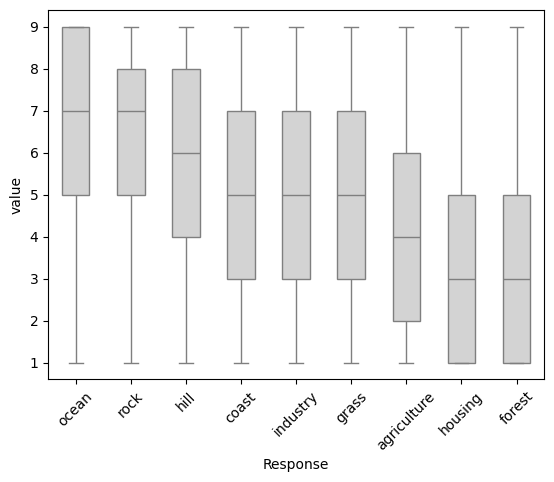

In [9]:
from data_visualization import box_plot

box_plot(data["windVisual"])

#### To what extent do you agree or disagree with placing wind turbines in the following areas?

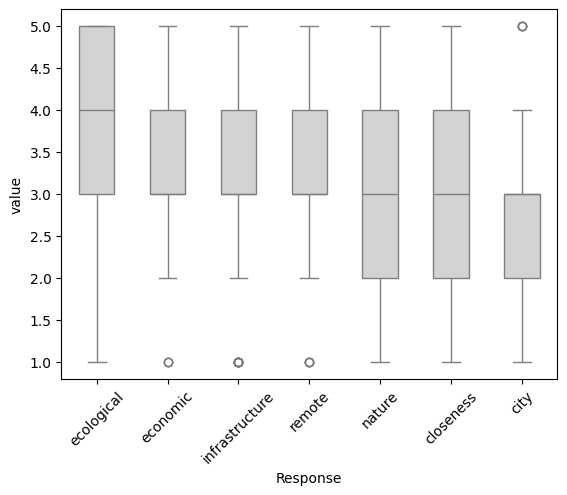

In [10]:
box_plot(data["windConsideration"])

'\nymin, ymax = 0, data["windVisual"].aggregate(lambda x: x.value_counts()).max().max()\n\nax[0].set_ylim(ymin, ymax)\nax[1].set_ylim(ymin, ymax)\nax[2].set_ylim(ymin, ymax)\n'

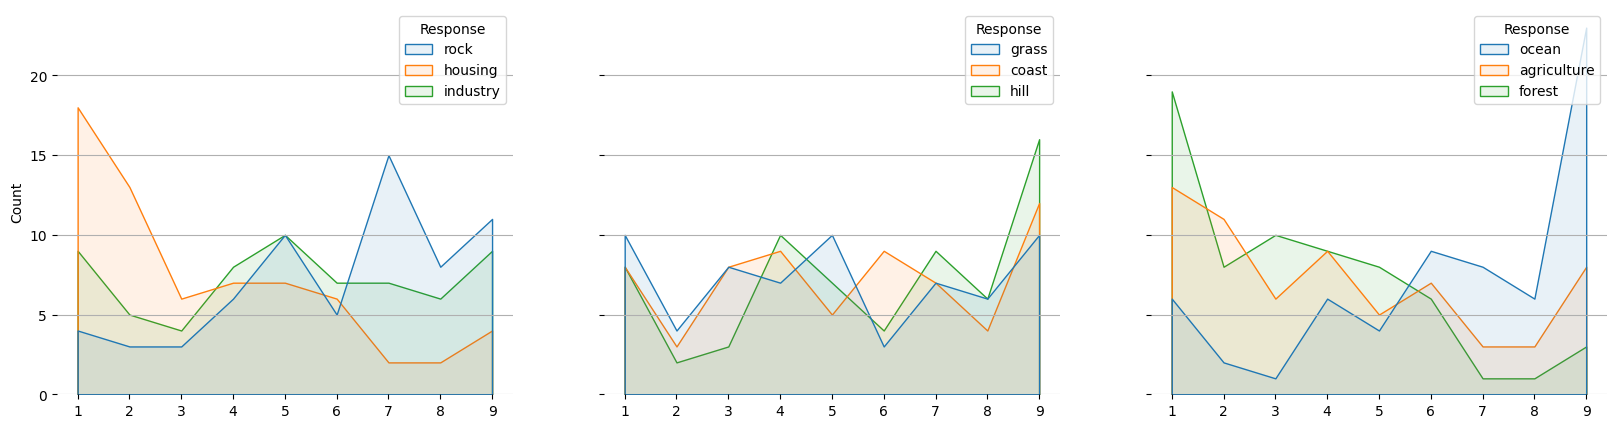

In [11]:
from data_visualization import hist_plot

fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize = (20,5), sharey = True)

hist_plot(data["windVisual"].iloc[:,0:3], ax[0])
hist_plot(data["windVisual"].iloc[:,3:6], ax[1])
hist_plot(data["windVisual"].iloc[:,6:9], ax[2])

"""
ymin, ymax = 0, data["windVisual"].aggregate(lambda x: x.value_counts()).max().max()

ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)
ax[2].set_ylim(ymin, ymax)
"""

# Visualization

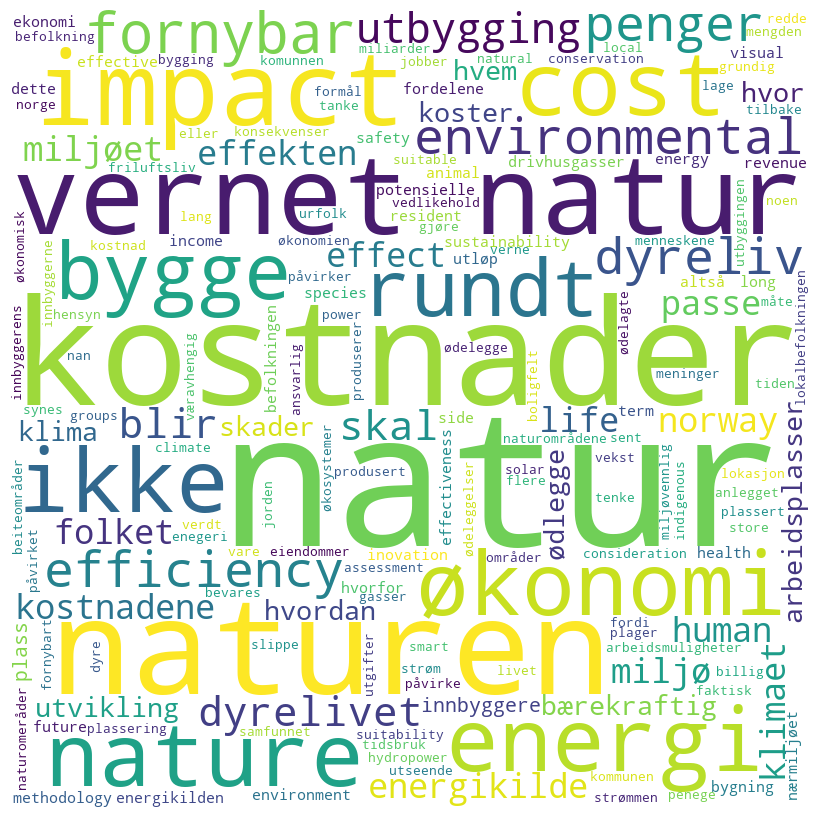

In [12]:
from data_visualization import word_cloud

# wordcloud
words = data["opinions"].dropna(axis=0)

word_cloud(words, "sub")

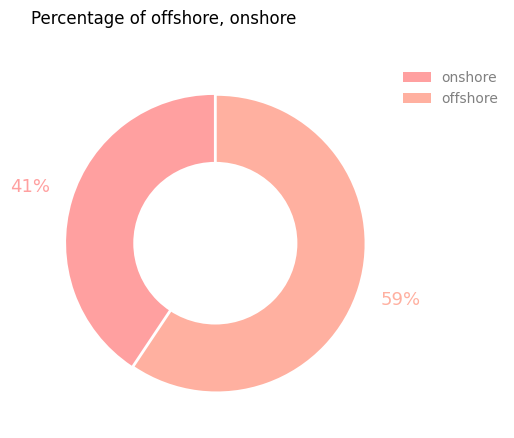

In [13]:
from data_visualization import donut_plot

count_offshore = data["energySource"]["offOffs"].value_counts()
count_onshore_big = data["energySource"]["bBs"].value_counts()
count_onshore_small = data["energySource"]["smSms"].value_counts()

count_onshore = count_onshore_big + count_onshore_small

# Combine into a dataframe and plot a simple bar-graph
wind_solar = pd.concat([count_onshore, count_offshore], axis = 1)
wind_solar.columns = ["onshore","offshore"]

wind_solar.index = ["exc. solar","inc. solar"]
# Convert to percentage and plot
total_responses = sum(wind_solar.aggregate(lambda x: x.sum()))

wind_solar = wind_solar.apply(lambda x: (x / total_responses)*100) # Convert to percentage

fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.set_title("Percentage of offshore, onshore", color = "black", pad = 25, loc = 'left')

donut_plot(wind_solar.iloc[1], fig, ax)

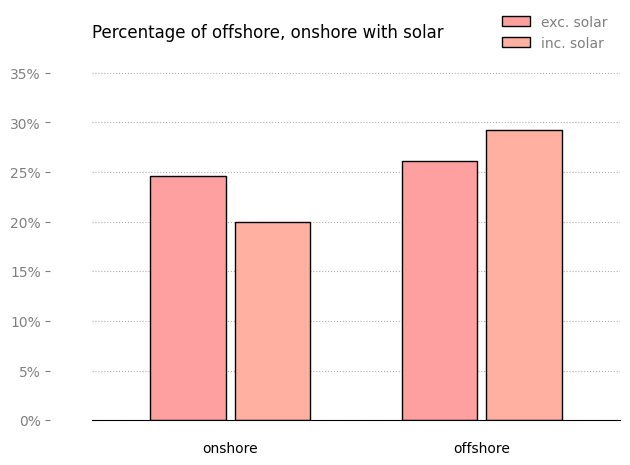

In [14]:
# Change colour between group, drop barcolour

from data_visualization import bar_chart

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
ax.set_title("Percentage of offshore, onshore with solar", color = "black", pad = 25, loc = 'left')

bar_chart(wind_solar.T, fig, ax)

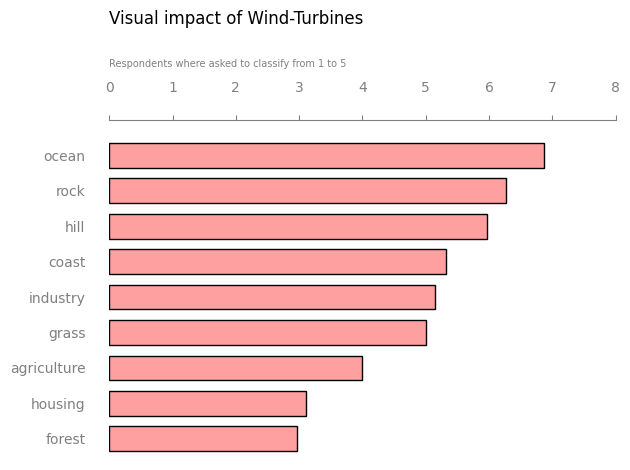

In [15]:
from data_visualization import bar_chart

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
colors = ['#ffa0a0', '#ffb0a0', '#ffc0a0', '#ffd0a0', '#ffe0a0', '#fff0a0']
wind_visual = ((data["windVisual"]-1)*1.25).mean().sort_values(ascending = True)
plot_data = wind_visual.to_frame()
ax.set_title("Visual impact of Wind-Turbines", color = "black", pad = 25, loc = 'left')
ax.set_xlim(0,8)
barh_chart(plot_data, fig, ax)

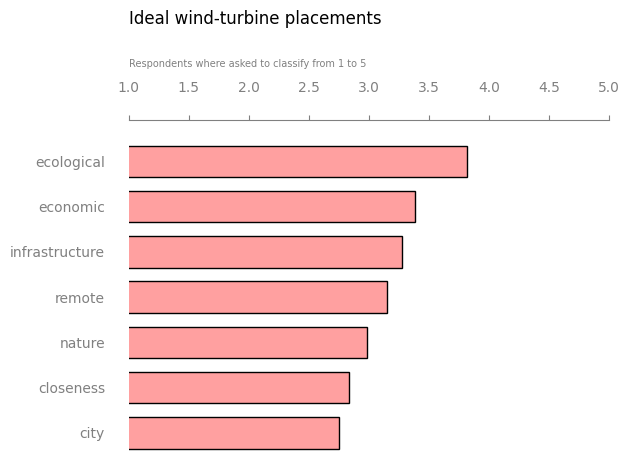

In [16]:
fig, ax = plt.subplots()
wind_consideration = data["windConsideration"].mean().sort_values(ascending = True)
ax.set_title("Ideal wind-turbine placements", color = "black", pad = 25, loc = 'left')
#fig.suptitle("Ideal Wind-Turbine placements")
ax.set_xlim(1,5)
barh_chart(wind_consideration.to_frame(),fig, ax)

### What do you find the most important to think about when producing electricity?

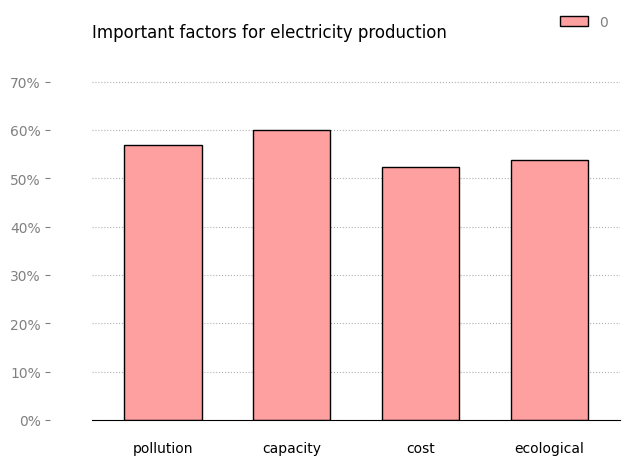

In [17]:
# TODO: change to a graph that better illustrates that it is out of 100% (not bar-graph)
from data_visualization import donut_plot

fig, ax = plt.subplots()

total_responses = 65
el_prod = data["electricProd"].aggregate(lambda x: x.sum()).to_frame()
el_prod = (el_prod / total_responses) * 100
ax.set_title("Important factors for electricity production", color = "black", pad = 25, loc = 'left')

bar_chart(el_prod, fig, ax)

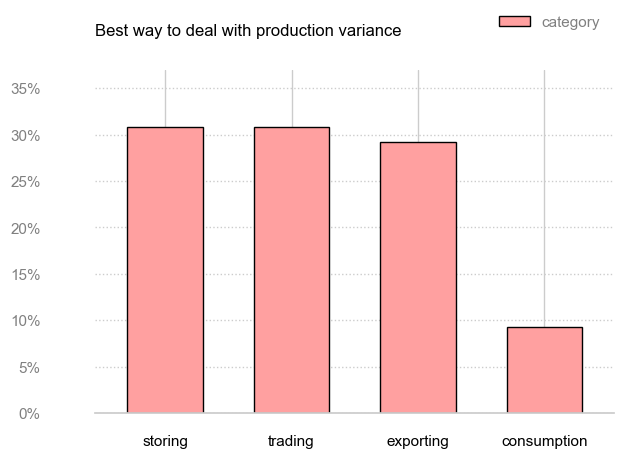

In [42]:
renewable_variance = data["renewableVariance"]
renewable_variance.columns = ["category"]

# Count the amount of chosen category
renewable_variance = renewable_variance.groupby('category')['category'].count().sort_values(ascending = False)

# Plot the relative difference
renewable_variance = (renewable_variance / sum(renewable_variance)) * 100
renewable_variance.columns = ["storing", "trading", "storing & trading","demand response"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
plot_data = renewable_variance.to_frame()
ax.set_title("Best way to deal with production variance", color = "black", pad = 25, loc = 'left')
bar_chart(plot_data, fig, ax)

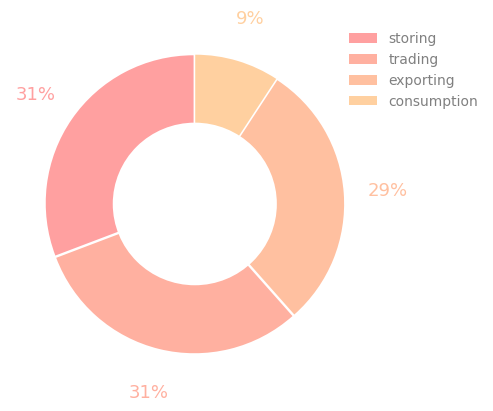

In [19]:
fig, ax = plt.subplots()
donut_plot(renewable_variance, fig, ax)

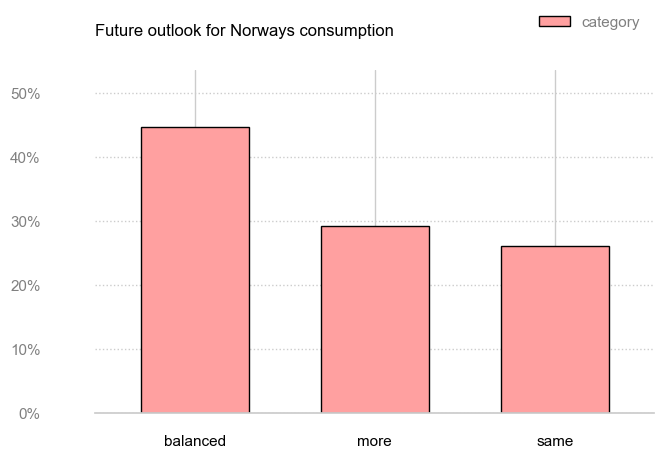

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import matplotlib.ticker as mtick

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.8,4.8])

import_outlook = data["importOutlook"]
import_outlook.columns = ["category"]

# Count the amount of chosen category
import_outlook = import_outlook.groupby('category')['category'].count().sort_values(ascending = False)

import_outlook.columns = ["import more", "import same", "import = export"]
# Plot the relative difference
import_outlook = (import_outlook / sum(import_outlook)) * 100
plot_data = import_outlook.to_frame()

ax.set_title("Future outlook for Norways consumption", color = "black", pad = 25, loc = 'left')
bar_chart(plot_data, fig, ax)

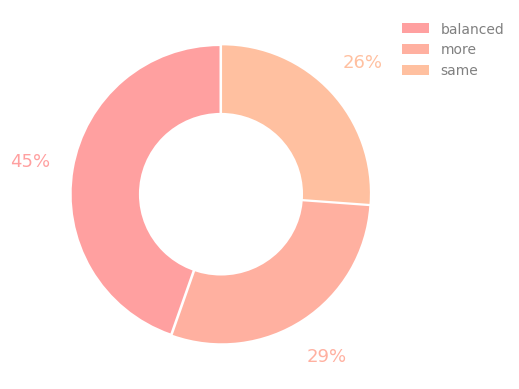

In [21]:
fig, ax = plt.subplots()
donut_plot(import_outlook, fig, ax)

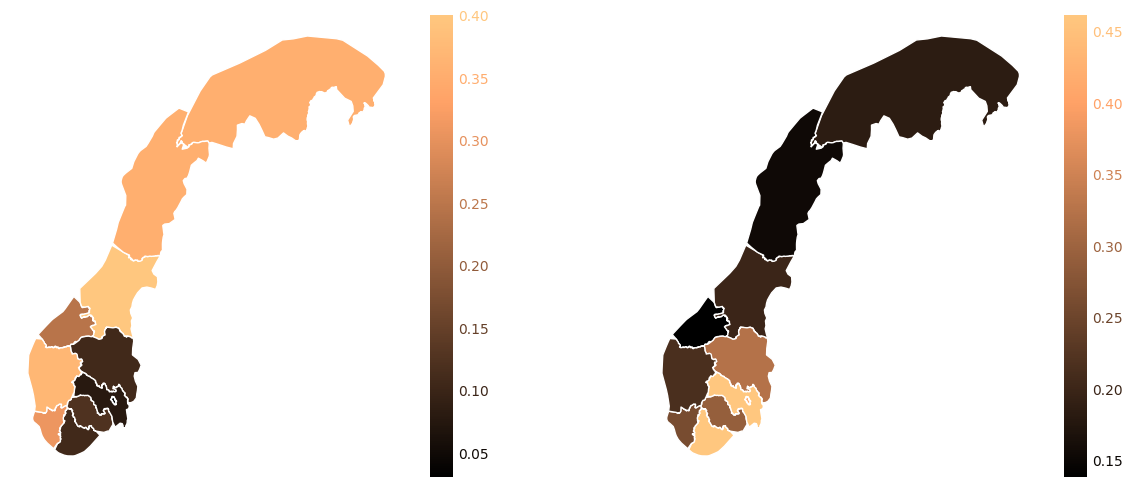

In [22]:
# TODO: add titles to each subplot, add municipality names
# TODO: find a fitting colour scheme between the graphs (green, blue, gray, yello (ask chatgpt for research paper colour))

import geopandas
from data_visualization import geo_plot


land_path = "files/fylker.geojson"
df = geopandas.read_file(land_path)

# Insert the areas as a column
df["area"] = df.area


# Join the dataset with the geopandas frame on the municipality nr

# Group them together and count the sum for each category as a percentage
# Plot them in the figure using a colorpalett
# Do the same thing for sun and wind data (how to show the differences in a nice way???)

fig, ax = plt.subplots(1,2, figsize = (15,6))
def get_geo(df, df_responses):
    n_responses = len(df_responses.index)
    df_responses = df_responses.aggregate(lambda x: (x.value_counts() / n_responses)).T
    df_responses.index.names = ["fylkesnummer"]
    df_responses.columns = ["neg", "pos"]

    # Removed unused columns
    df = df.drop(columns = ["objtype", "navnerom", "versjonid", "datauttaksdato", "opphav", "datafangstdato"])

    combined = pd.merge(df, df_responses, on = "fylkesnummer")
    return combined

com = get_geo(df, data["windMun"])
geo_plot(com, fig, ax[0])

com = get_geo(df, data["sunPower"])
geo_plot(com, fig, ax[1])

(<Figure size 920x500 with 1 Axes>, <Axes: >)

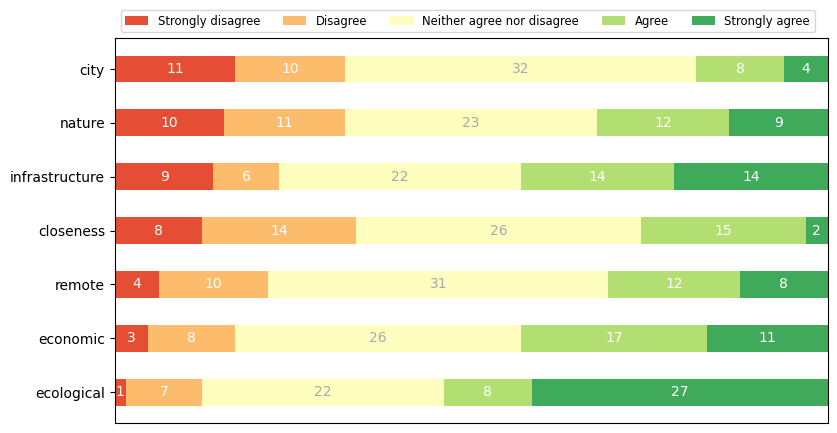

In [23]:
# TODO: get axis names (ask Shahzad)
# TODO: make this to percentage instead of absolute values

from data_visualization import survey

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']

df = data["windConsideration"].melt().value_counts().to_frame().groupby(["Response","value"]).sum()["count"].reset_index()
pivot_df = df.pivot(index='value', columns='Response', values='count')

# Sort the values
sort_values = pivot_df.iloc[0].values

# Step 2: Sort the columns of pivot_df based on sort_values
sorted_columns = pivot_df.columns[np.argsort(sort_values)][::-1]

# Step 3: Reassign the sorted DataFrame back to pivot_df
pivot_df = pivot_df[sorted_columns]


column_names = pivot_df.columns.to_list()
array = pivot_df.to_numpy()
result_dict = {column_names[i]: array[:, i].tolist() for i in range(array.shape[1])}
survey(result_dict, category_names)

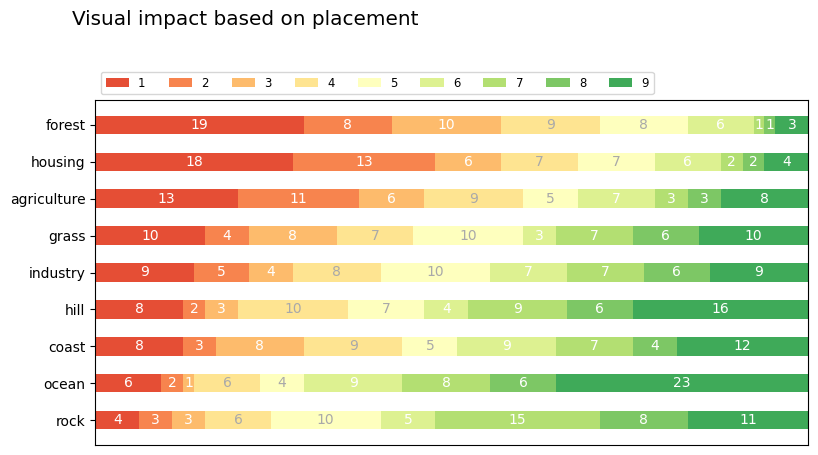

In [24]:
# TODO: to messy, find a fitting graph (maybe box-plot - see top)

from data_visualization import survey

category_names = [str(i + 1) for i in range(9)]

df = data["windVisual"].melt().value_counts().to_frame().groupby(["Response","value"]).sum()["count"].reset_index()
pivot_df = df.pivot(index='value', columns='Response', values='count')

# Sort the values
sort_values = pivot_df.iloc[0].values

# Step 2: Sort the columns of pivot_df based on sort_values
sorted_columns = pivot_df.columns[np.argsort(sort_values)][::-1]

# Step 3: Reassign the sorted DataFrame back to pivot_df
pivot_df = pivot_df[sorted_columns]


column_names = pivot_df.columns.to_list()
array = pivot_df.to_numpy()
result_dict = {column_names[i]: array[:, i].tolist() for i in range(array.shape[1])}
fig, ax = survey(result_dict, category_names)
fig.suptitle("Visual impact based on placement", x=0.1, y=0.98, fontsize='x-large', ha='left')
fig.subplots_adjust(top=0.8)

# Grouping

In [25]:
# Sort between the schools
data[("date", "sub")] = data[("created", "sub")].dt.date
pd.set_option('display.max_rows', None)

# Set option to display all columns
pd.set_option('display.max_columns', None)

column = "electricProd"

# Get count
column_mul = [(column, x) for x in data[column].columns.to_list()]

melted_data = data.melt(id_vars=[("date", "sub"),], value_vars=[x for x in data.columns if x[0] == column])

# Step 2: Pivot Table to count occurrences
pivot_table = melted_data.pivot_table(index=[("date", "sub")], columns='value', aggfunc='size', fill_value=0)

melted_data.drop("Question", inplace = True, axis = 1)

melted_grouped = melted_data.groupby([("date","sub"), "Response"]).apply(lambda x: x["value"].value_counts()) 
df_group = melted_grouped.to_frame()
df_group = df_group.reset_index()

old_values = df_group[('date', 'sub')].unique()
new_values = ["school1", "school2", "school3"]

[df_group[('date', 'sub')].replace(old,new, inplace = True) for old, new in zip(old_values, new_values)]
df_group.rename(columns = {('date', 'sub'):"school"}, inplace = True)

In [26]:
# Normalize the data (here multiple questions can be chosen)

response_counts = df_group.groupby(['school', 'Response'])["count"].sum().reset_index(name='total_count')

#response_counts

df_group_with_total = pd.merge(df_group, response_counts, on=['school','Response'])
df_group_with_total['proportion'] = df_group_with_total['count'] / df_group_with_total['total_count']

### What is the most important factor when producing electricity?

['capacity' 'cost' 'ecological' 'pollution']


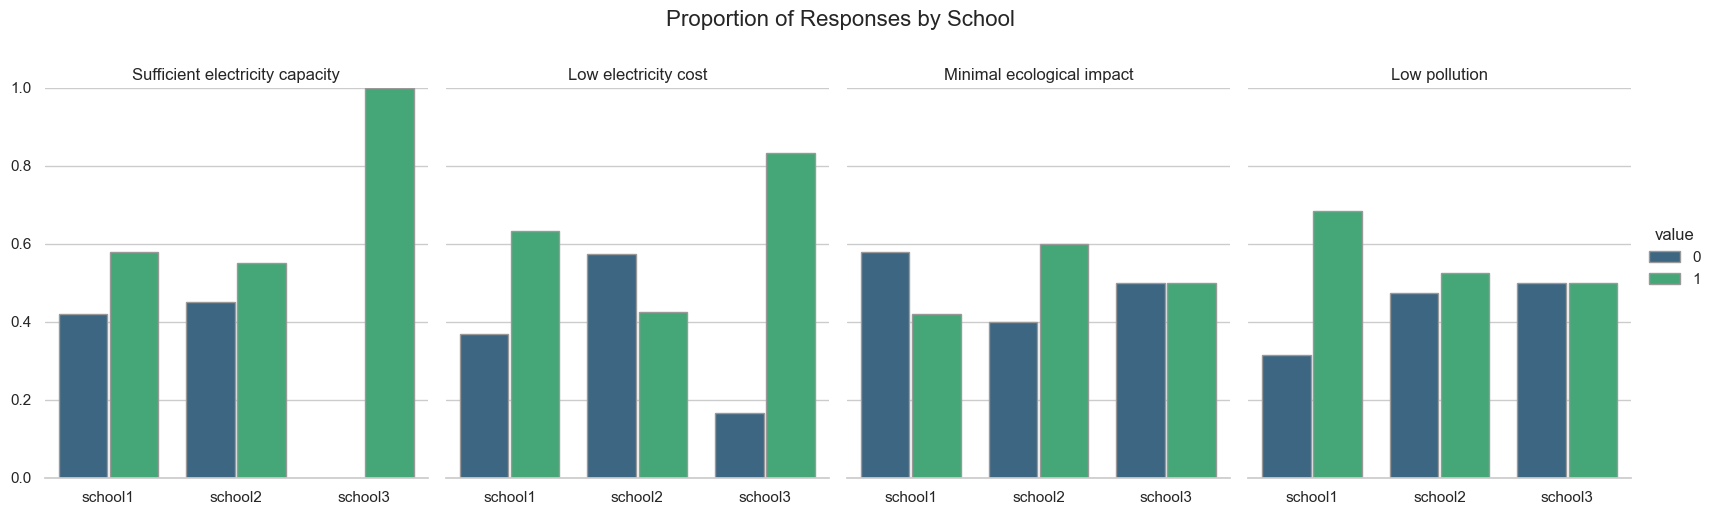

In [27]:
# TODO: show the selection of each question (ignore the questions not shown)

sns.set_theme(style="whitegrid")

# Create the plot with customized palette and increased bar width
g = sns.catplot(data=df_group_with_total, x='school', y='proportion', hue='value', col='Response', kind='bar', height=6, aspect=.7, palette='viridis', edgecolor=".6", legend = True)
# Customize the plot with titles, labels, and legend

g.figure.suptitle("Proportion of Responses by School", fontsize=16)
g.figure.subplots_adjust(top=0.85)

g.set_axis_labels("", "")
g.set(ylim=(0, 1))  # Adjust y-axis limits to be between 0 and 1 if proportions are used
#.add_legend(title="Responses")

#ax._legend.remove()
#ax.legend(loc="lower left", ncol=len(df.columns))
# Extract handles and labels for the legend

g.despine(left = True)

# Create a new horizontal legend at the bottom of the figure

# Adjust the figure to prevent clipping of the bottom
plt.subplots_adjust(bottom=0.2)

categories = df_group_with_total["Response"].unique()
print(categories)
#new_titles = [f"{cat}" for cat in categories]  # Update this list with your actual titles
new_titles = ["Sufficient electricity capacity","Low electricity cost", "Minimal ecological impact", "Low pollution"]

# Iterate over the axes and set new titles
for ax, new_title in zip(g.axes.flat, new_titles):
    ax.set_title(new_title)

for ax in g.axes.flat:
    for bar in ax.patches:
        # Reduce the width of each bar
        current_width = bar.get_width()
        diff = current_width - 0.95 * current_width  # Adjust 0.8 to desired gap size
        # Set new width
        bar.set_width(0.95 * current_width)
        # Re-center the bar
        bar.set_x(bar.get_x() + diff * 0.5)


# Fine-tune and display the plot
#plt.tight_layout()
plt.show()

# Extra

category
balanced    29
more        19
same        17
Name: category, dtype: int64


<Axes: xlabel='category'>

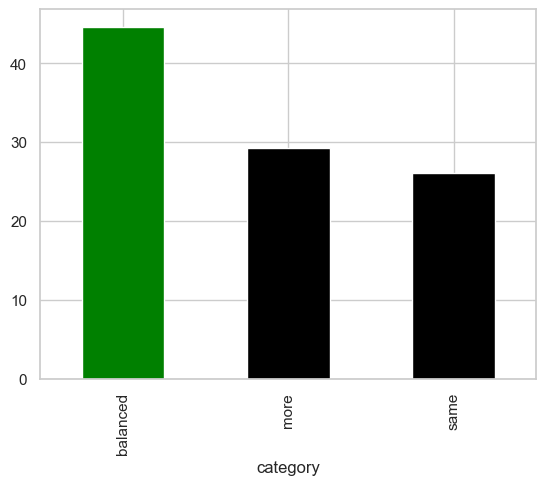

In [28]:
import_outlook = data["importOutlook"]
import_outlook.columns = ["category"]

# Count the amount of chosen category
import_outlook = import_outlook.groupby('category')['category'].count().sort_values(ascending = False)

print(import_outlook)

# Plot the relative difference
import_outlook = (import_outlook / sum(import_outlook)) * 100

max_value = import_outlook.max()
colors = ["black" if (val < max_value) else "green" for val in import_outlook]
import_outlook.plot.bar(color = colors)

In [29]:
# Add a date column
data[("date", "sub")] = data[("created", "sub")].dt.date
columns = ["date","energySource","windMun","windVisual","windConsideration","sunPower","electricProd","renewableVariance","importOutlook","powerLine"]
column = [("renewableVariance", "sub")]
column_mul = [("windMun", x) for x in data["windMun"].columns.to_list()]

series_list = []

# Iterate over the columns, perform value_counts, and append the Series to the list
for column in column_mul:
    series = data[column].value_counts()
    series.name = column 
    series_list.append(series)

df_mul = pd.concat(series_list, axis = 1)
df_mul

windMun                                        
       42  34  15  18  03  11  38  54  50  46  30
0      58  58  49  42  63  45  57  42  39  41  60
1       7   7  16  23   2  20   8  23  26  24   5

1.0    16
2.0    13
Name: count, dtype: int64
offOffs
2.0    19
1.0    17
Name: count, dtype: int64


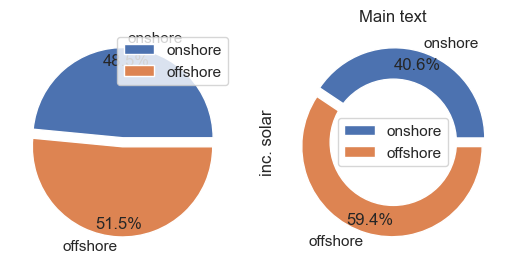

In [30]:
# Bonus code
count_offshore = data["energySource"]["offOffs"].value_counts()
count_onshore_big = data["energySource"]["bBs"].value_counts()
count_onshore_small = data["energySource"]["smSms"].value_counts()

count_onshore = count_onshore_big + count_onshore_small

# See the values
print(count_onshore_small + count_onshore_big)
print(count_offshore)

# Combine into a dataframe and plot a simple bar-graph
wind_solar = pd.concat([count_onshore, count_offshore], axis = 1)
wind_solar.columns = ["onshore","offshore"]
wind_solar.index = ["","inc. solar"]

# Convert to percentage and plot
total_responses = sum(wind_solar.aggregate(lambda x: x.sum()))

explode = (0.05,0.05)
wind_solar = wind_solar.apply(lambda x: (x / total_responses)*100) # Convert to percentage
wind_solar.T.plot(kind = "pie",subplots=True,autopct='%1.1f%%', pctdistance=0.85, explode = explode)
plt.title("Main text")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


['left', 'right', 'bottom', 'top']
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


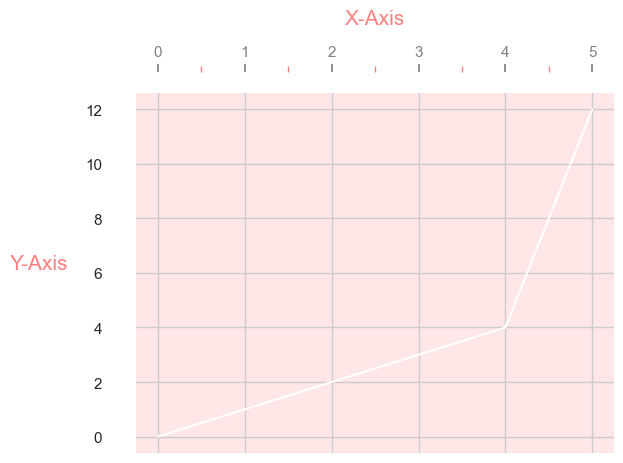

In [31]:
fig, ax = plt.subplots(nrows=1,ncols = 1)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# All keys for the spine-object
print([key for key in ax.spines.keys()])

# Move the left spine to the left
ax.spines["left"].set_position(position=('outward', 15))
ax.spines["top"].set_position(position=('outward',15))

print(type(fig))
print(type(ax))

# Values to plot
y_values = [0,1,2,3,4, 12]
ax.plot(y_values, color = "white")

# Set the colors
fig.set_facecolor(color = "white")
ax.set_facecolor(color = '#ff808030') # The last two digits are the alpha

# Change the ticks
major_xticks = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) * (len(y_values) - 1)
ax.set_xticks(major_xticks)

ax.tick_params(axis = "x", which = 'both', colors = "gray", top = True, bottom = False, labelbottom = False, labeltop = True)
ax.tick_params(axis = "y", color = "gray")

# Add minor ticks to the x-axis
ax.minorticks_on()

minor_xticks = (major_xticks[1:] + major_xticks[0:-1]) / 2 # Get the middle value
ax.set_xticks(minor_xticks, minor = True)
ax.tick_params(axis = 'x', which = 'minor', colors = '#ff8080ff') # Change the color for the minor-tick

ax.tick_params(axis='y', which = 'minor', left = False) # Remove the left, minor ticks

# Set labels
ax.set_xlabel(xlabel = "X-Axis", color = '#ff8080ff', loc = 'center', labelpad = 15, fontsize = 15, fontfamily = 'sans-serif')
ax.xaxis.set_label_position(position='top')

y_label = 'Y-Axis'
ax.set_ylabel(ylabel=y_label, color = '#ff8080ff', labelpad = 15 + len(y_label)*3, rotation = 'horizontal', fontsize = 15, fontfamily = 'sans-serif')

plt.tight_layout()
plt.show()

Response
ocean          6.865385
rock           6.269231
hill           5.961538
coast          5.326923
industry       5.153846
grass          5.000000
agriculture    4.000000
housing        3.115385
forest         2.961538
dtype: float64


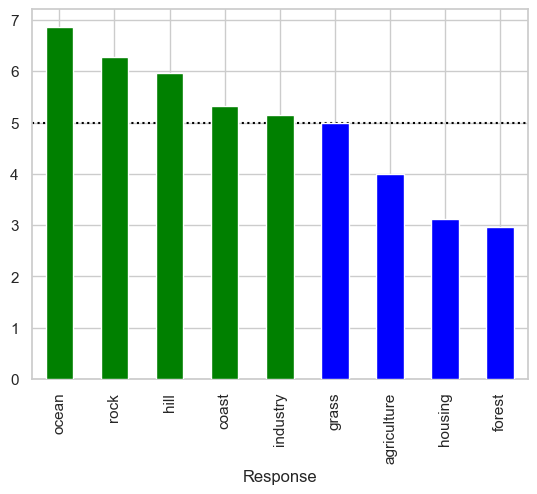

In [32]:
wind_visual = ((data["windVisual"]-1)*1.25).mean().sort_values(ascending = False)

print(wind_visual)

# TODO: set index to 1
# Barplot
center = 5
colors = ["green" if value > center else "blue" for value in wind_visual]
ax = wind_visual.plot.bar(color = colors,zorder = 3)
ax.axhline(y=center,color = "black",linestyle = "dotted",zorder = 2)

In [33]:
# Plot the bars using pyplot
x_values = np.arange(len(wind_solar.T.index))
y_values = wind_solar.T.values
width = 0.3
padding = 1.1
print(x_values)

plt.bar(x = x_values - (width / 2) * padding, height = y_values[::2].flatten(), width = width)
plt.bar(x = x_values + (width / 2) * padding, height = y_values[1::2].flatten(), width = width)

plt.close()

[0 1]


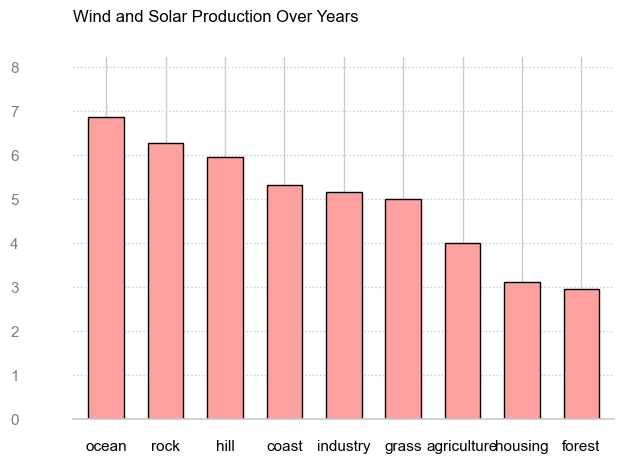

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
colors = ['#ffa0a0', '#ffb0a0', '#ffc0a0', '#ffd0a0', '#ffe0a0', '#fff0a0']
wind_visual = ((data["windVisual"]-1)*1.25).mean().sort_values(ascending = False)
plot_data = wind_visual.to_frame()

# Remove all spines
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.spines["bottom"].set_visible(True)
# Add the dataplot with zorder 2 (to be on top)
bar_width = 0.6
plot_data.plot(kind='bar', ax=ax, colormap='copper', legend=False, zorder=2, width = bar_width)

# Ensure the highest point shown is above the highest point
max_value = (plot_data).max().max()  # Find the maximum value in the dataset after multiplication
ax.set_ylim(0, max_value * 1.2)  # Increase the max limit by 10% for some padding

# Change y-axis
ax.spines['left'].set_position(position=('outward', 30))
ax.tick_params(axis='y', colors= 'gray')

# Change bar-colors and the padding between the bars
groups = statistics.median(range(len(plot_data.columns)))
j, i = 0, 0
offset = bar_width * 0.03
for bar in ax.patches:
    # Adjust the padding calculation to account for the direction
    padding = -offset if i < groups else offset if i > groups else 0
    bar.set(facecolor = colors[i], x = bar.get_x() + padding,  edgecolor = "black")
    j += 1
    i = int(j / len(plot_data.index))

# Change bar-text
ax.tick_params(axis='x', length=0, labelrotation=0, labelcolor= "black", pad=15)

# Change y-acis to percentage
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Change legend
legend_values = plot_data.columns
#ax.legend(legend_values, loc='upper right', labelcolor="gray", facecolor="white", edgecolor="white", frameon=False, bbox_to_anchor=(1, 1.2))

# Add vertical box-lines with zorder 1 (behind the bars)
ax.yaxis.grid(visible=True, linestyle="dotted", zorder=1)
ax.set_axisbelow(True)

# Remove x_label
ax.set_xlabel(None)

# Add title text
ax.set_title("Wind and Solar Production Over Years ", color = "black", pad = 25, loc = 'left')
plt.tight_layout()
plt.show()

Response
city              2.753846
closeness         2.830769
nature            2.984615
remote            3.153846
infrastructure    3.276923
economic          3.384615
ecological        3.815385
dtype: float64


[]

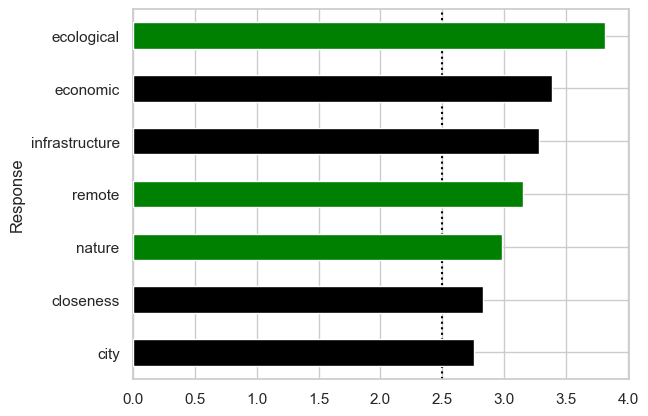

In [35]:
wind_consideration = data["windConsideration"].mean().sort_values(ascending = True)

print(wind_consideration)

# TODO: set index to 1
center = 5/2
untouched_nature = ["remote","nature","ecological"]
colors = ["green" if col in untouched_nature else "black" for col in wind_consideration.index]
ax = wind_consideration.plot.barh(color = colors,zorder = 3)
ax.axvline(x=center,color = "black",linestyle = "dotted",zorder=2)
ax.plot()

category
storing        20
trading        20
exporting      19
consumption     6
Name: category, dtype: int64


<Axes: xlabel='category'>

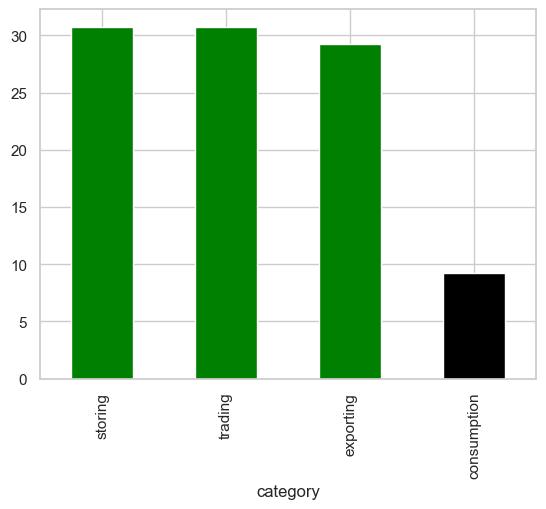

In [36]:
renewable_variance = data["renewableVariance"]
renewable_variance.columns = ["category"]

# Count the amount of chosen category
renewable_variance = renewable_variance.groupby('category')['category'].count().sort_values(ascending = False)

print(renewable_variance)

# Plot the relative difference
renewable_variance = (renewable_variance / sum(renewable_variance)) * 100

min_value = renewable_variance.min()
colors = ["green" if (val > min_value) else "black" for val in renewable_variance]
renewable_variance.plot.bar(color = colors)

category
balanced    29
more        19
same        17
Name: category, dtype: int64


<Axes: xlabel='category'>

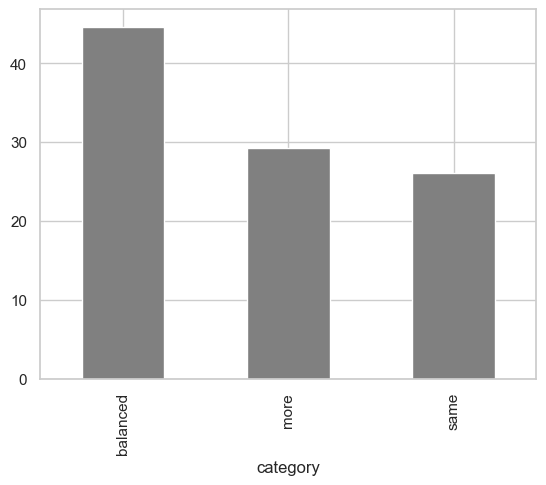

In [45]:
import_outlook = data["importOutlook"]
import_outlook.columns = ["category"]

# Count the amount of chosen category
import_outlook = import_outlook.groupby('category')['category'].count().sort_values(ascending = False)

print(import_outlook)

# Plot the relative difference
import_outlook = (import_outlook / sum(import_outlook)) * 100

max_value = import_outlook.max()
colors = ["gray" if (val < max_value) else "gray" for val in import_outlook]
import_outlook.plot.bar(color = colors)

category
overground     32
underground    29
nothing         4
Name: category, dtype: int64


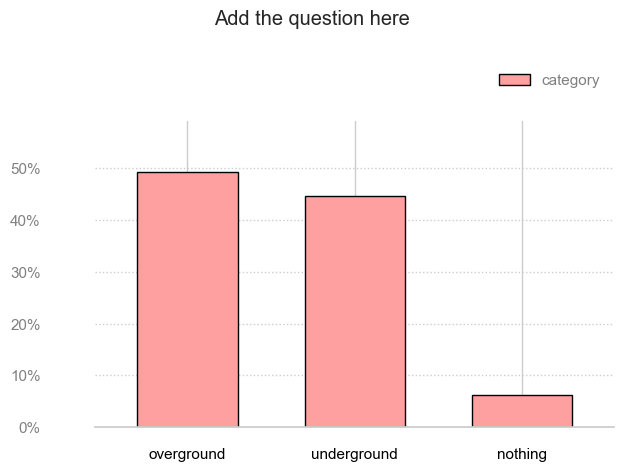

In [51]:
import_outlook = data["powerLine"]
import_outlook.columns = ["category"]

# Count the amount of chosen category
import_outlook = import_outlook.groupby('category')['category'].count().sort_values(ascending = False)

print(import_outlook)

# Plot the relative difference
import_outlook = (import_outlook / sum(import_outlook)) * 100
import_outlook.columns = ["Overhead", "Subsurface", "Same as today"]

max_value = import_outlook.max()
colors = ["gray" if (val < max_value) else "gray" for val in import_outlook]
fig, ax = plt.subplots()
fig.suptitle("Add the question here")
bar_chart(import_outlook.to_frame(), fig,ax)


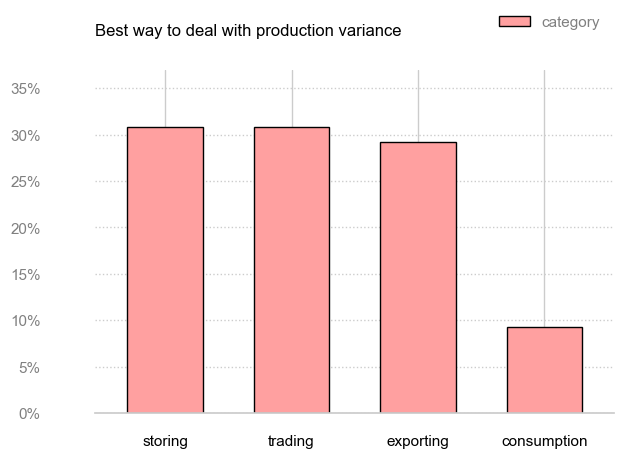

In [ ]:
renewable_variance = data["renewableVariance"]
renewable_variance.columns = ["category"]

# Count the amount of chosen category
renewable_variance = renewable_variance.groupby('category')['category'].count().sort_values(ascending = False)

# Plot the relative difference
renewable_variance = (renewable_variance / sum(renewable_variance)) * 100
renewable_variance.columns = ["storing", "trading", "storing & trading","demand response"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
plot_data = renewable_variance.to_frame()
ax.set_title("Best way to deal with production variance", color = "black", pad = 25, loc = 'left')
bar_chart(plot_data, fig, ax)

category
overground     32
underground    29
nothing         4
Name: category, dtype: int64


<Axes: xlabel='category'>

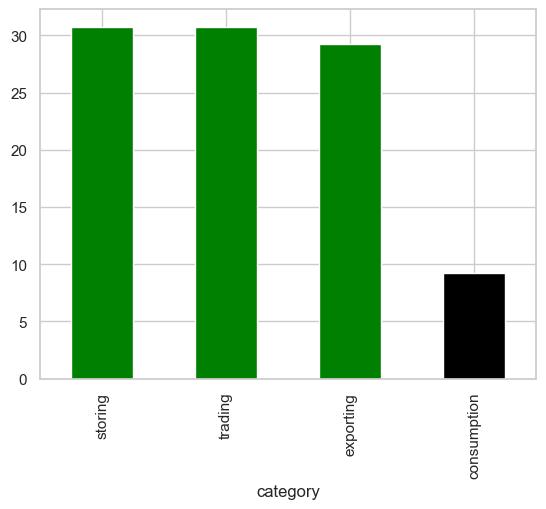

In [38]:
power_lines = data["powerLine"]
power_lines.columns = ["category"]

# Count the amount of chosen category
power_lines = power_lines.groupby('category')['category'].count().sort_values(ascending = False)

print(power_lines)

# Plot the relative difference
renewable_variance = (renewable_variance / sum(renewable_variance)) * 100

min_value = renewable_variance.min()
colors = ["green" if (val > min_value) else "black" for val in renewable_variance]
renewable_variance.plot.bar(color = colors)

In [39]:
series_list = []

for column in column_mul:
    series = data[[column, ("date", "sub")]].groupby([("date", "sub")])[column[0]].apply(lambda x: x.value_counts()) 
    series_list.append(series)


#df_series = [data[[c, ("date", "sub")]].groupby([("date", "sub")])[c[0]].apply(lambda x: x.value_counts()) for c in column_mul]

df_date = pd.concat(series_list[0:1], axis = 1)
df_date.head()

#print(type(series_list[0]))
#print(type(series_list[1]))
#print(type(series_list[2]))
#print(series_list[0].to_frame())

windMun
(date, sub) 42         
2024-05-24  0        17
            1         2
2024-05-31  0        35
            1         5
2024-06-03  0         6